# Actividad Semanal -- 7 K-means
## Nombre : Ernesto Nicanor Santillán Guerrero

## Matricula : A01793675

## Materia: Ciencia y analítica de datos

## Profesor: María de la Paz Rico Fernández

## Fecha: 11 de Noviembre de 2022

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27813 sha256=5e9bf0ae8d553c7a78bc44cb9dcb02729bf31099f00a47866dd25bece3f9c9c9
  Stored in directory: c:\users\santien\appdata\local\pip\cache\wheels\fc\8c\52\0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136904 sha256=a208049ee6a528601e2c691a3c992f2b44f0f48cc1894bf0774c36dc4dec70bd
  Stored in directory: c:\users\santien\appdata\local\pip\cache\wheels\c9\21\f6\17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [3]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [4]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [294]:
latlong=df[["latitude","longitude"]]

In [295]:
print(len(latlong))

1839


¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

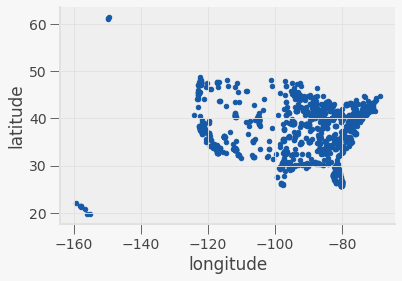

In [296]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [297]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [298]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [299]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [300]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [301]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [302]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

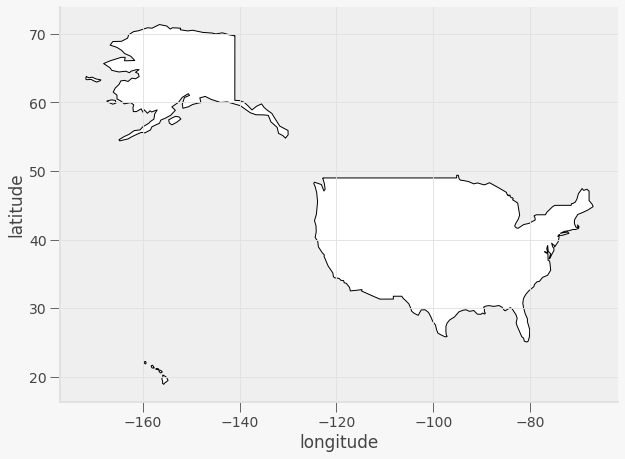

In [303]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

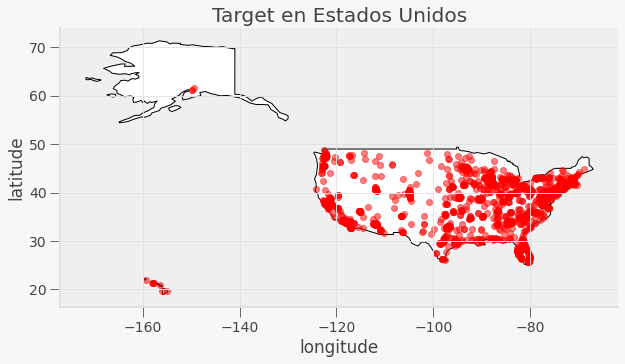

In [304]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [305]:
#tu codigo aquí

Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber dónde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

Encuentra el numero ideal de almacenes, justifica tu respuesta:

Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?
¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.

In [306]:
len(latlong)

1839

# Observaciones preliminares
* Son 1839 tiendas que tienen que ser alimentadas por x número de almacenes
* Se observa mas densidad de tiendas a los extremos de estados unidos (las costas) 


In [307]:
# importamos librerias
from sklearn.cluster import KMeans
import geopy.distance

## Estimar número optimo de clusters (calculando inertia y graficando)

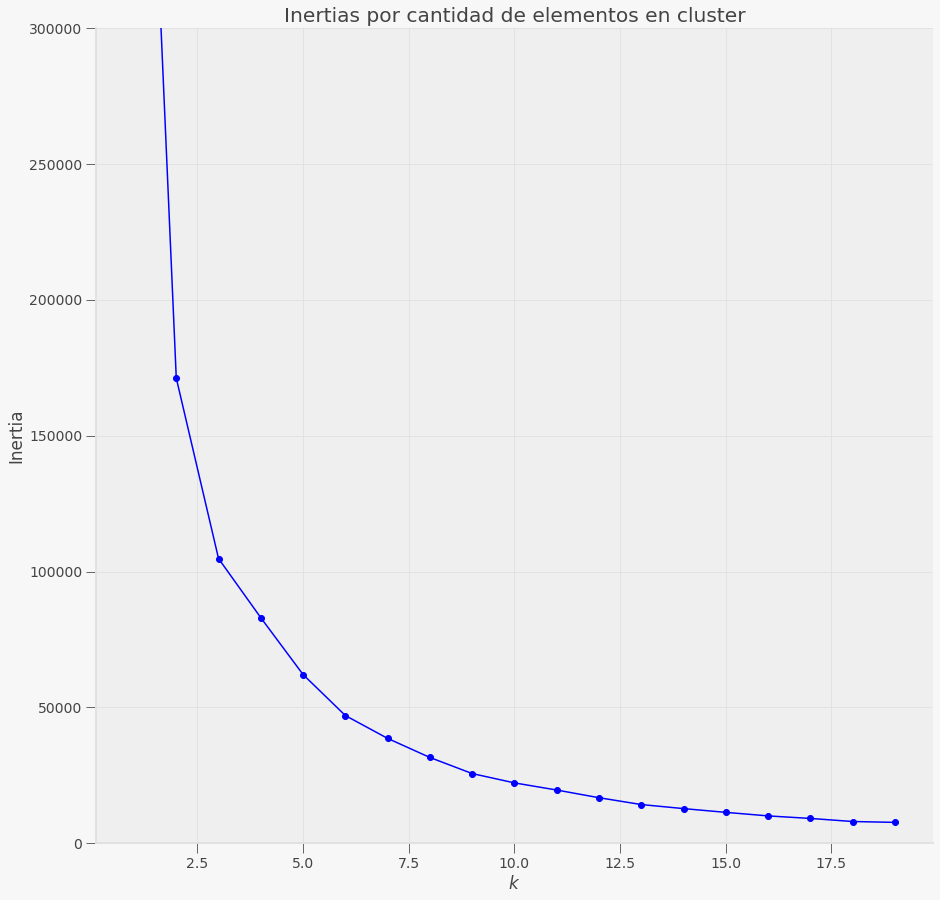

In [308]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(latlong)
                for k in range(1, 20)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(15, 15));
plt.title('Inertias por cantidad de elementos en cluster')
plt.plot(range(1, 20), inertias, "bo-");
plt.xlabel("$k$");
plt.ylabel("Inertia");
plt.ylim(0,300000);

## Codo se forma en K = 10 en mi estimación. 
## Podemos usar metodo alterno descrito en (Aurélien Géron, 2022)

In [309]:
from sklearn.metrics import silhouette_score

In [310]:
silhouette_score(latlong, kmeans.labels_)

0.5405606051728992

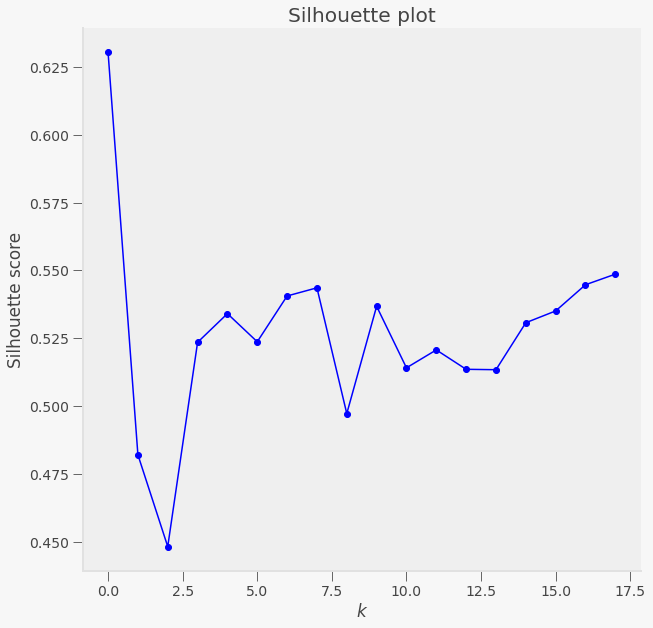

In [311]:
silhouette_scores = [silhouette_score(latlong, model.labels_)
                     for model in kmeans_per_k[1:]]

silhouette_scores
plt.figure(figsize=(10, 10))
plt.plot(range(0, 18), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.grid()
plt.title('Silhouette plot')
plt.show()

## Basado en esta visualización escogemos K=8

In [312]:
k = 8
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(latlong)

In [313]:
latlong1=latlong.copy(deep=True)

In [314]:
latlong1['labels']=kmeans.labels_

In [315]:
latlong1

,latitude,longitude,labels
0,33.224225,-86.804174,4
1,33.334550,-86.989778,4
2,30.602875,-87.895932,4
3,34.560148,-86.971559,4
4,31.266061,-85.446422,4
...,...,...,...
1834,43.034293,-88.176840,2
1835,42.989604,-88.259806,2
1836,42.846799,-106.264166,5
1837,41.162019,-104.800048,5


In [316]:
def funcenter(label,center):
    return center[label]

In [317]:
res=funcenter(kmeans.labels_,kmeans.cluster_centers_)

In [318]:
res

array([[  31.10819903,  -82.60386029],
       [  31.10819903,  -82.60386029],
       [  31.10819903,  -82.60386029],
       ...,
       [  37.56677907, -108.56162352],
       [  37.56677907, -108.56162352],
       [  37.56677907, -108.56162352]])

In [319]:
latlong1['latitude_c']=res[:,0]

In [320]:
latlong1['longitude_c']=res[:,1]

In [321]:
latlong1

,latitude,longitude,labels,latitude_c,longitude_c
0,33.224225,-86.804174,4,31.108199,-82.603860
1,33.334550,-86.989778,4,31.108199,-82.603860
2,30.602875,-87.895932,4,31.108199,-82.603860
3,34.560148,-86.971559,4,31.108199,-82.603860
4,31.266061,-85.446422,4,31.108199,-82.603860
...,...,...,...,...,...
1834,43.034293,-88.176840,2,41.627442,-88.942735
1835,42.989604,-88.259806,2,41.627442,-88.942735
1836,42.846799,-106.264166,5,37.566779,-108.561624
1837,41.162019,-104.800048,5,37.566779,-108.561624


In [322]:
# Calcular distancas
def my_distancias(row):
    tup1 = (row['latitude'],row['longitude'])
    tup2 = (row['latitude_c'],row['longitude_c'])
    return geopy.distance.geodesic(tup1, tup2).km   

distancias=latlong1.apply(my_distancias, axis=1)

In [323]:
latlong1['distances_to_center']=distancias

In [324]:
latlong1

,latitude,longitude,labels,latitude_c,longitude_c,distances_to_center
0,33.224225,-86.804174,4,31.108199,-82.603860,460.391924
1,33.334550,-86.989778,4,31.108199,-82.603860,481.469169
2,30.602875,-87.895932,4,31.108199,-82.603860,509.216179
3,34.560148,-86.971559,4,31.108199,-82.603860,560.043271
4,31.266061,-85.446422,4,31.108199,-82.603860,271.502316
...,...,...,...,...,...,...
1834,43.034293,-88.176840,2,41.627442,-88.942735,168.538457
1835,42.989604,-88.259806,2,41.627442,-88.942735,161.443592
1836,42.846799,-106.264166,5,37.566779,-108.561624,617.982601
1837,41.162019,-104.800048,5,37.566779,-108.561624,514.093379


In [325]:
cities=df['name'].values

In [326]:
latlong1['cities']=cities

In [327]:
#from geopy.geocoders.yandex import location
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

In [328]:
geolocator = Nominatim(user_agent="myapp")

In [329]:
direcciones=[]
for item in kmeans.cluster_centers_:
    r=str(item[0])+","+str(item[1])
    location = geolocator.reverse(r)
    direcciones.append(location.address)

## Localización de almacenes (coordenadas)

In [331]:
kmeans.cluster_centers_

array([[  40.34460877,  -75.66614111],
       [  46.97944073, -122.66305544],
       [  41.62744206,  -88.94273528],
       [  35.43471729, -118.94132621],
       [  31.10819903,  -82.60386029],
       [  37.56677907, -108.56162352],
       [  32.007881  ,  -96.19918029],
       [  20.94542771, -157.31225085]])

## Ciudades y direcciones que representa

In [332]:
print(direcciones)

['South Cleaver School Road, Colebrookdale Township, Berks County, Pennsylvania, 19512, United States', 'Thurston County, Washington, United States', '3577, North 48th Road, Wyoming Township, Lee County, Illinois, 61353, United States', '5666, Adolphus Avenue, Kern River Oil Field, Kern County, California, 93308, United States', 'Jim Mixon Road, Ware County, Georgia, 31550, United States', 'Montezuma County, Colorado, United States', 'US 287, Navarro County, Texas, United States', 'United States']


## distancias promedio de cada centro de cluster a los miembros de su grupo

In [333]:
latlong1.groupby(['labels']).mean()['distances_to_center']

labels
0    279.149892
1    291.982579
2    378.319665
3    274.754967
4    411.187938
5    507.268910
6    326.809444
7    138.257686
Name: distances_to_center, dtype: float64

## Ciudades a surtir por almacen

In [334]:
latlong1.groupby(['labels'])['cities'].count()

labels
0    485
1     73
2    451
3    219
4    261
5    132
6    210
7      8
Name: cities, dtype: int64

Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, después nos auxiliamos de una librería de datos geográficos.

¿qué librerías nos pueden ayudar a graficar este tipo de datos?
¿Consideras importante que se grafique en un mapa?, ¿por qué?
Agrega las conclusiones

* Las librerías mas comunes son
* Arcpy https://pro.arcgis.com/en/pro-app/arcpy/get-started/what-is-arcpy-.htm
* GeoPandas
* GDAL/OGR https://gdal.org/

¿Consideras importante que se grafique en un mapa?

* ¿Consideras importante que se grafique en un mapa?
* Si, ayuda mucho poder ver el resultado. No solo se debe depender de las metricas y
* cantidades calculadas

In [345]:
centers_df = pd.DataFrame(data = kmeans.cluster_centers_, columns=['latitude','longitude'])

In [346]:
centers_df['Coordinates'] = list(zip(centers_df.longitude,centers_df.latitude ))
centers_df['Coordinates'] = centers_df['Coordinates'].apply(Point)

In [347]:
centers_df = gpd.GeoDataFrame(centers_df,geometry='Coordinates')
centers_df.head()

,latitude,longitude,Coordinates
0,40.344609,-75.666141,POINT (-75.66614 40.34461)
1,46.979441,-122.663055,POINT (-122.66306 46.97944)
2,41.627442,-88.942735,POINT (-88.94274 41.62744)
3,35.434717,-118.941326,POINT (-118.94133 35.43472)
4,31.108199,-82.603860,POINT (-82.60386 31.10820)


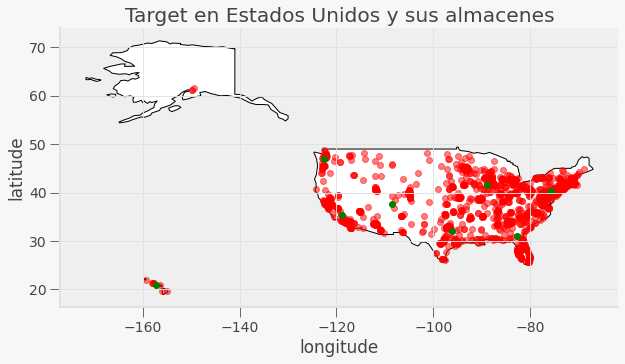

In [350]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)
centers_df.plot(ax=gax,color='green')

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos y sus almacenes')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

* Conclusiones
* En este ejercicio pudimos aplicar el método no supervisado de Kmeans. Logramos determinar el número óptimo de almacenes,   donde se localizan, la distancia promedio a recorrer para llevar suministros a las tiendas y el número de tiendas que se   requiere alimentar. 
* Para el número óptimo de agrupaciones utilizamos las técnicas descritas por (Aurélien Géron, 2022) en su libro de texto. 
* Este método es muy poderoso y fácil de aplicar. Dominado las librerías GIS se puede lograr visualizaciones sorprendentes. 


# Referencias


### Aurélien Géron. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. “O’Reilly Media, Inc.”